In [232]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/uciml/breast-cancer-wisconsin-data/versions/2


In [233]:
ls /root/.cache/kagglehub/datasets/uciml/breast-cancer-wisconsin-data/versions/2

data.csv


In [234]:
import pandas as pd
df= pd.read_csv("/root/.cache/kagglehub/datasets/uciml/breast-cancer-wisconsin-data/versions/2/data.csv")

In [235]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [237]:
df=df.drop(columns=["id"],axis=1)
df=df.drop(columns=["Unnamed: 32"],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

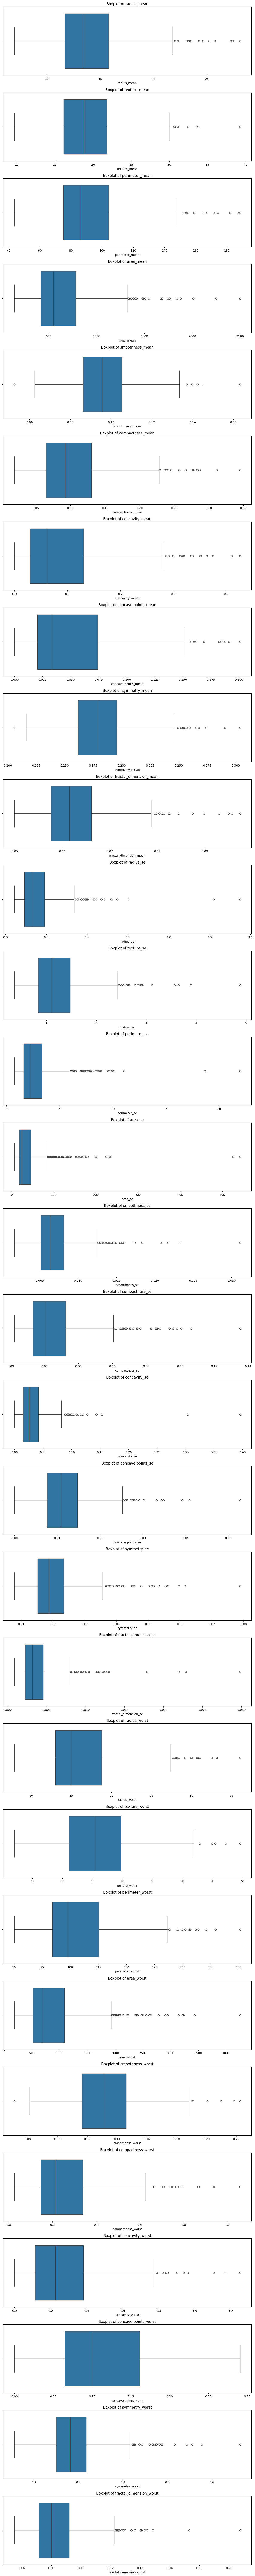

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def generate_boxplots(data):

    numerical_columns = data.select_dtypes(include=['number']).columns

    plt.figure(figsize=(12, len(numerical_columns) * 4))
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(len(numerical_columns), 1, i)
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)

    plt.tight_layout()
    plt.show()

generate_boxplots(df)


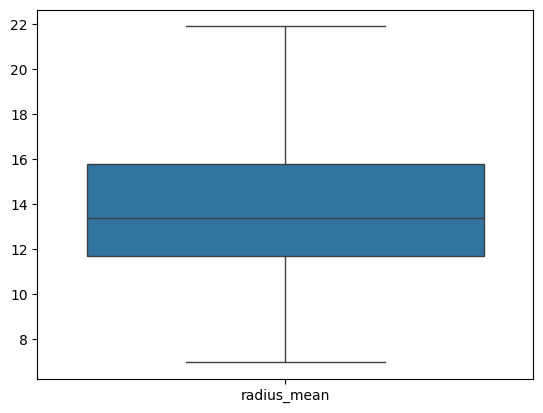

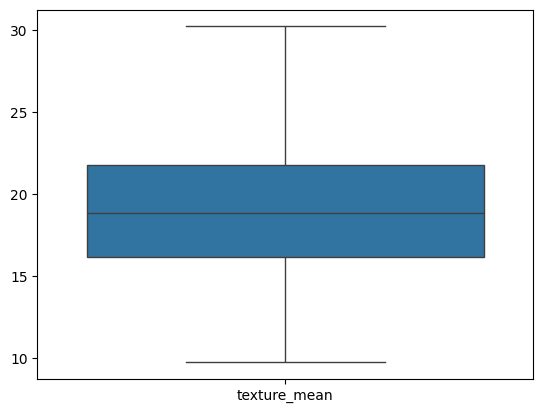

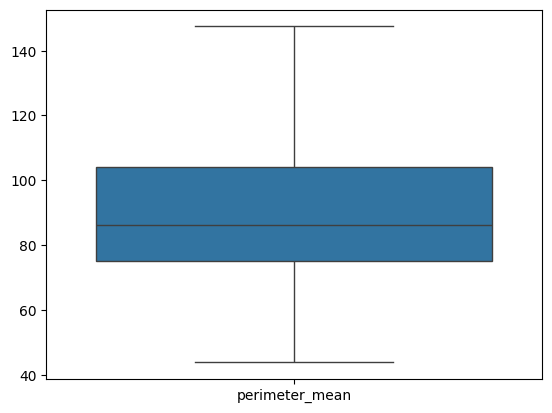

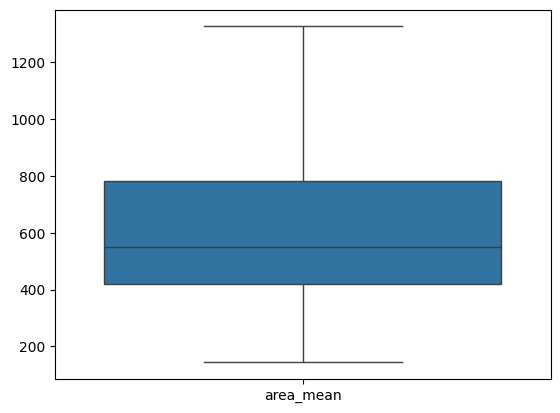

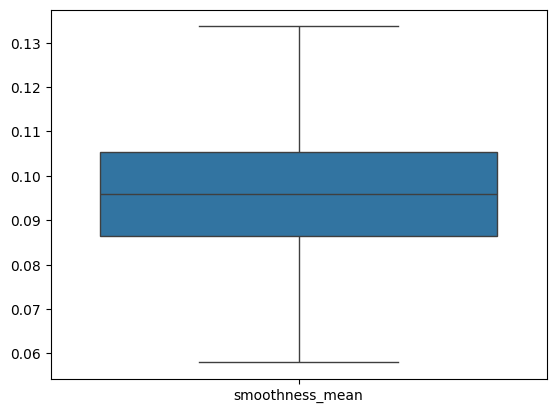

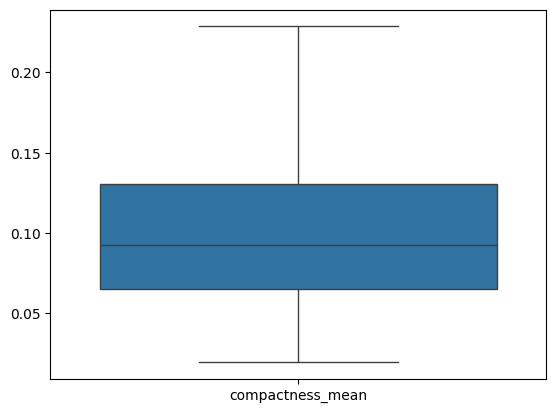

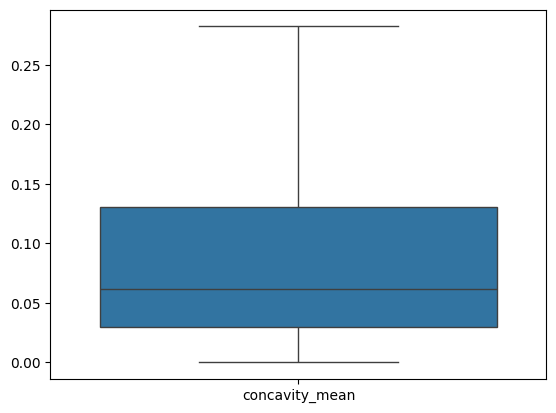

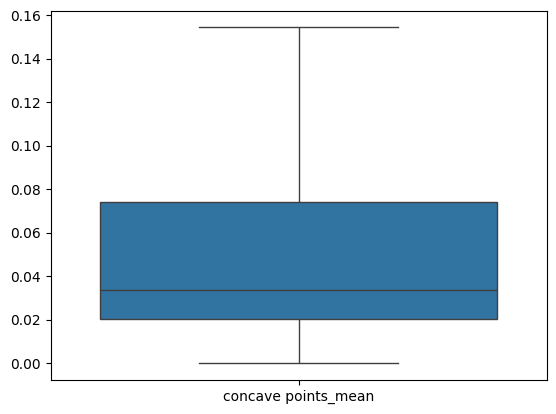

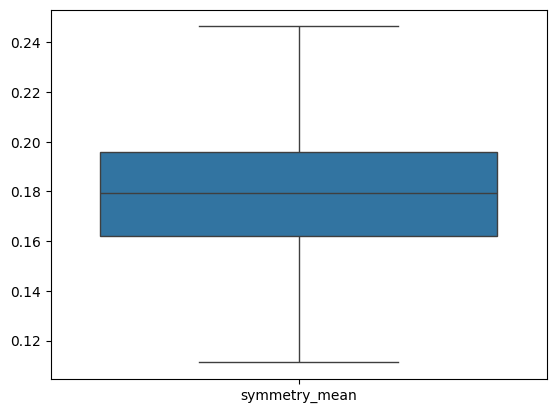

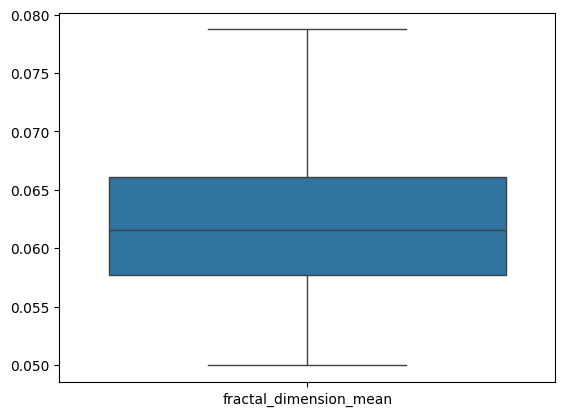

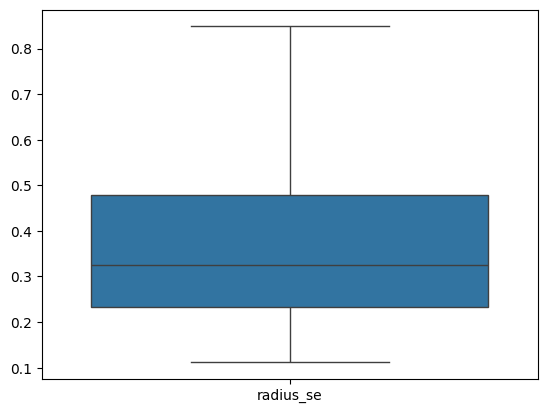

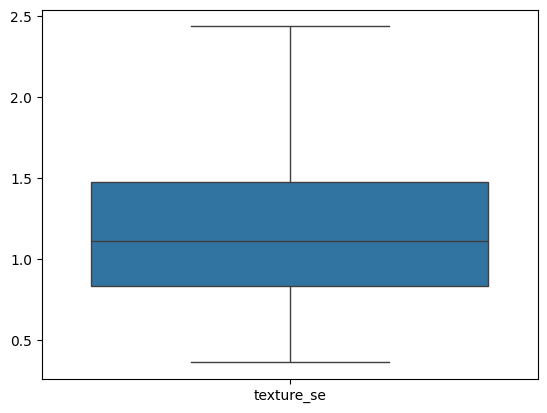

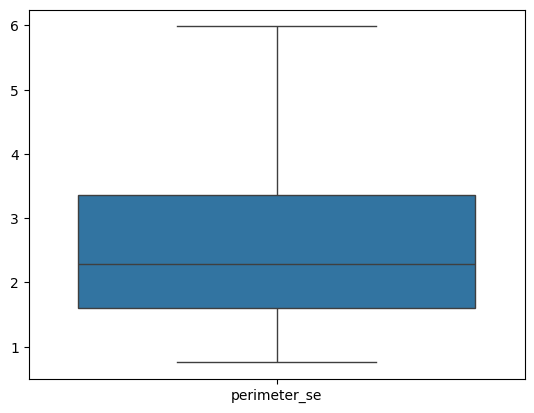

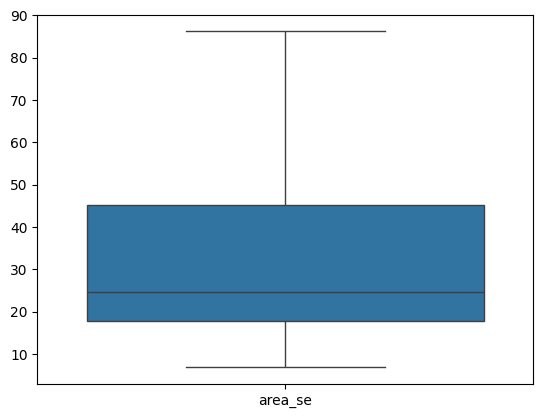

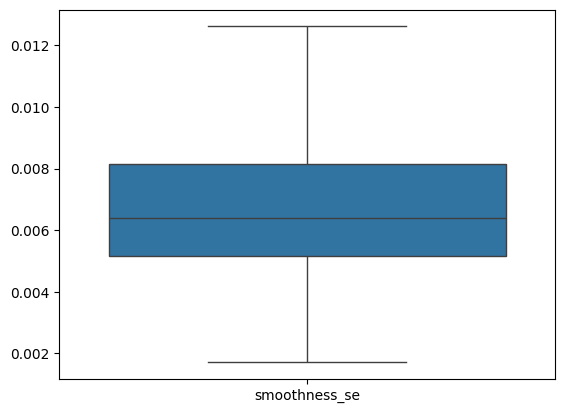

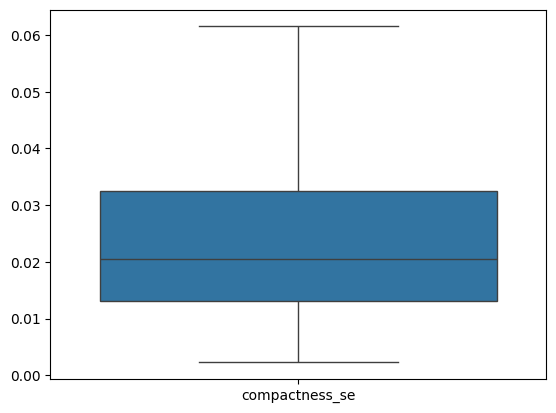

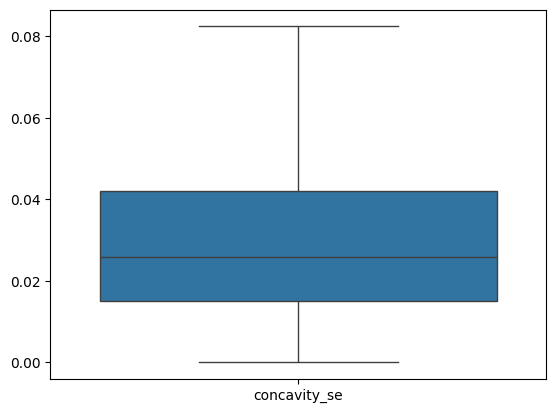

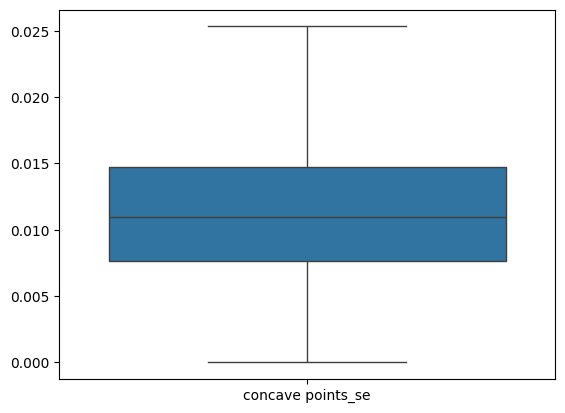

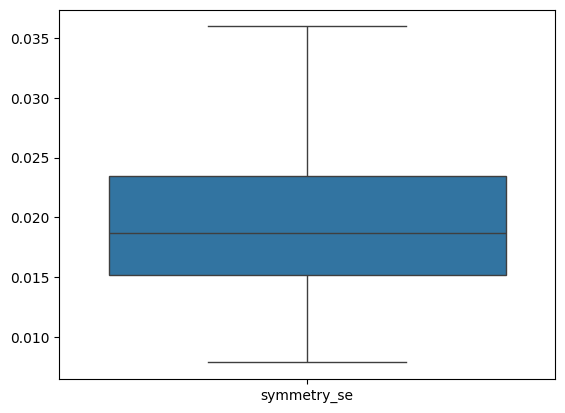

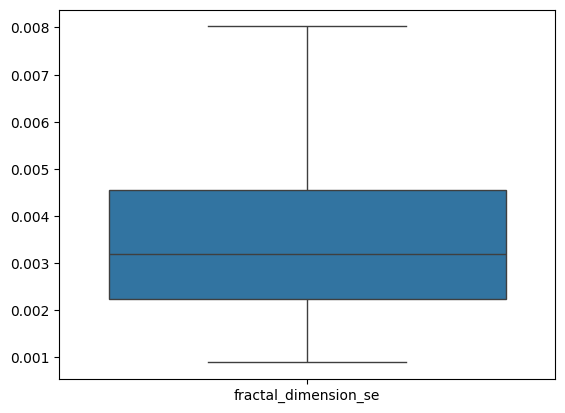

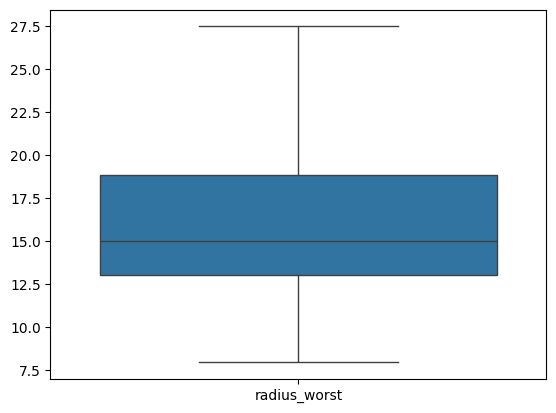

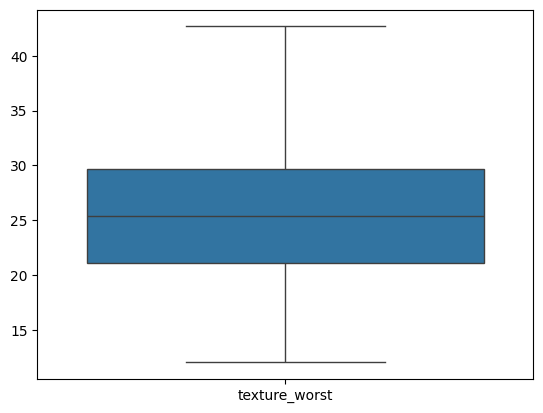

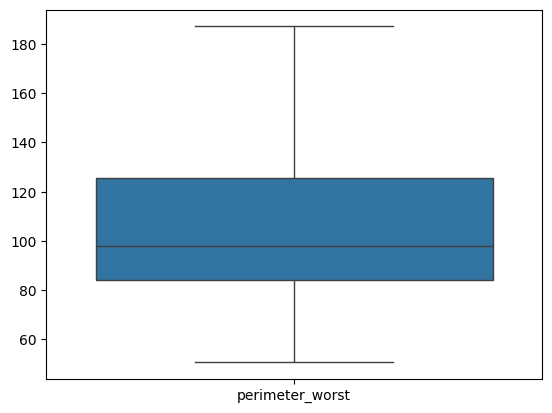

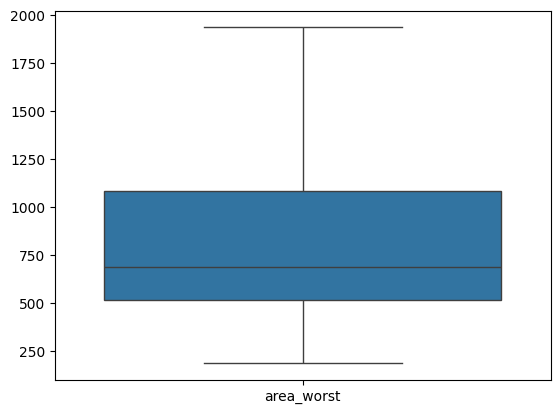

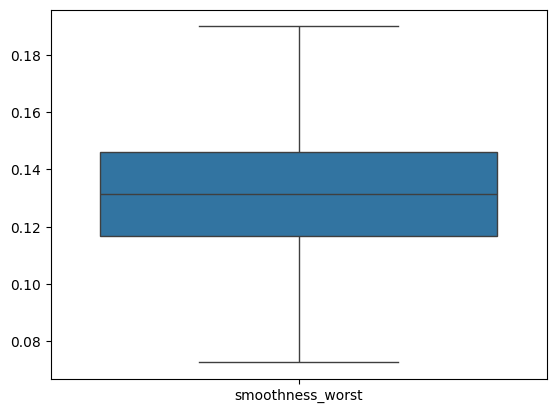

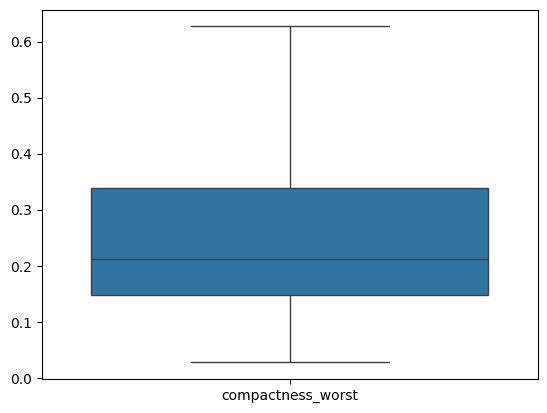

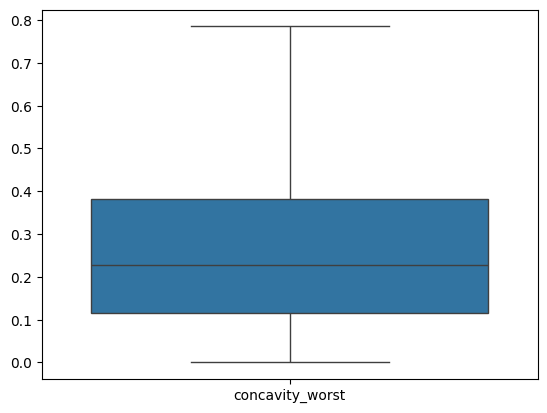

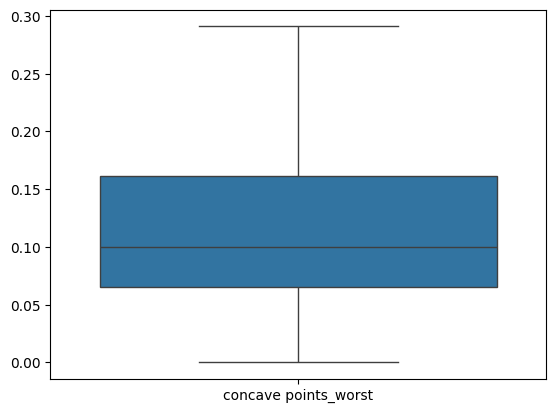

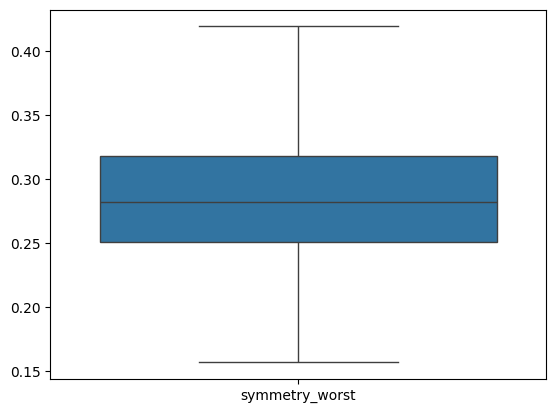

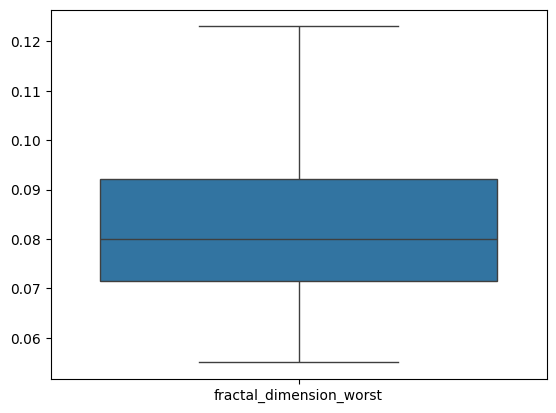

In [239]:
def addressing_outliers(col):
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  outliers= df[df[col]<lower_bound]
  outliers= df[df[col]>upper_bound]
  df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
  sns.boxplot(df[[col]])
  plt.show()

num_df=df.select_dtypes(include=['number']).columns
for i, col in enumerate(num_df):
  addressing_outliers(col)

In [240]:
#sns.pairplot(df)

Text(0.5, 1.0, 'Correlation Heatmap')

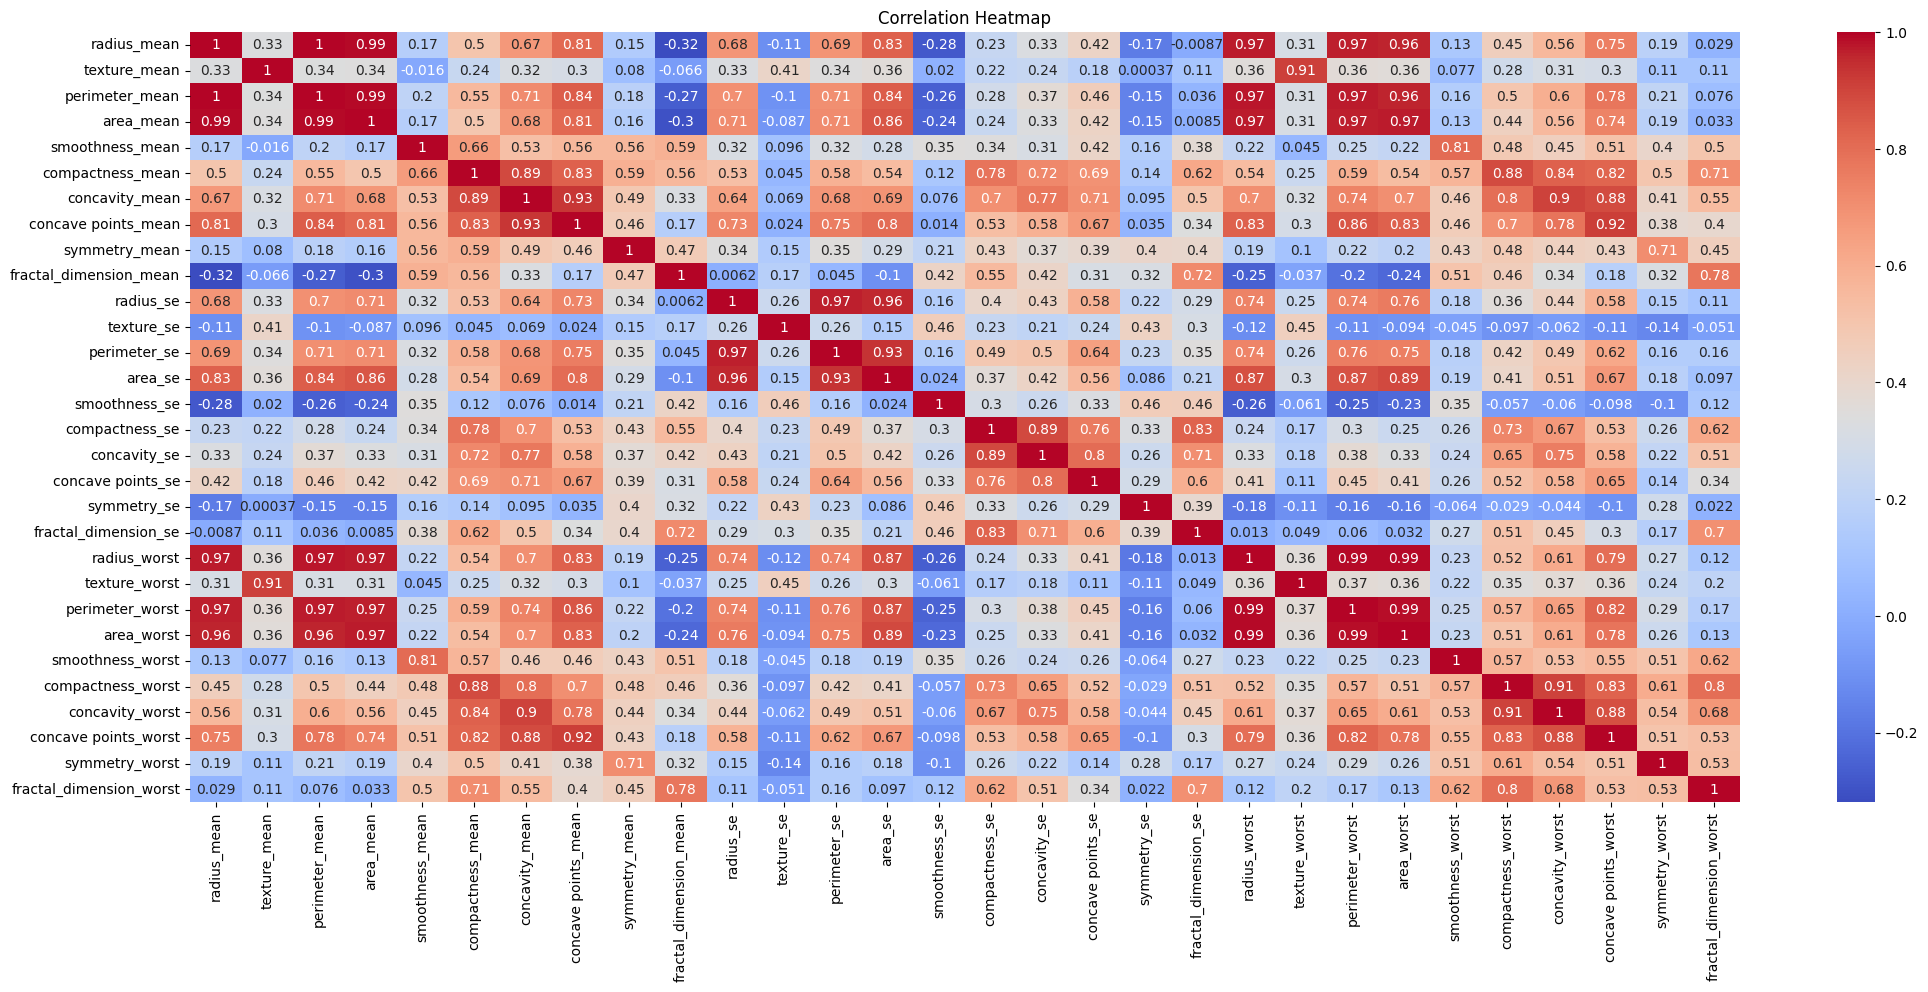

In [241]:
numerical_df = df.select_dtypes(include=["number"])
corr=numerical_df.corr()
plt.figure(figsize=(25, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

In [242]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [243]:
len(corr)

30

In [244]:
# lt=[]
# for i in range(len(df)):
#   for j in range(i+1,len(corr)-1):
#     if corr.iloc[i, j]>0.85:
#       lt.append(corr.columns[j])

# df=df.drop(columns=lt, axis=1)
# numerical_df = df.select_dtypes(include=["number"])
# corr=numerical_df.corr()
# plt.figure(figsize=(25, 10))
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# len(corr)

In [245]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler


In [246]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

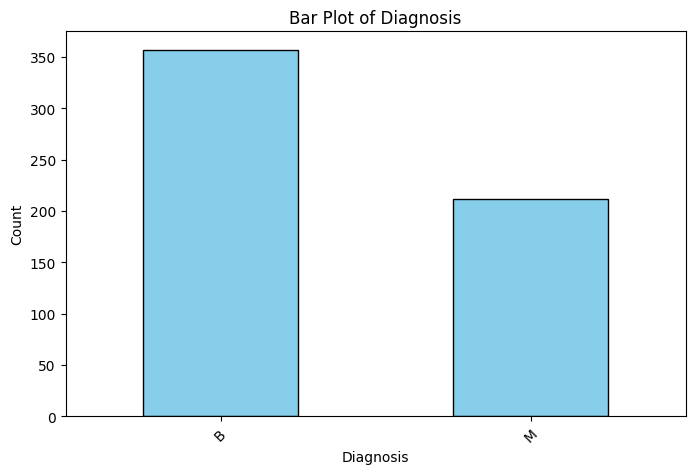

In [247]:

value_counts = df['diagnosis'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
value_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Customize plot
plt.xlabel('Diagnosis')
plt.ylabel("Count")
plt.title(f"Bar Plot of Diagnosis")
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary


# Show plot
plt.show()

In [343]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
from sklearn.preprocessing import LabelEncoder

x= df[numerical_df.columns]
y= df['diagnosis']
# Normalize features
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True)

Accuracy: 0.9580
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        83
           1       0.97      0.93      0.95        60

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143

Cross-Validation Accuracy: 0.9614



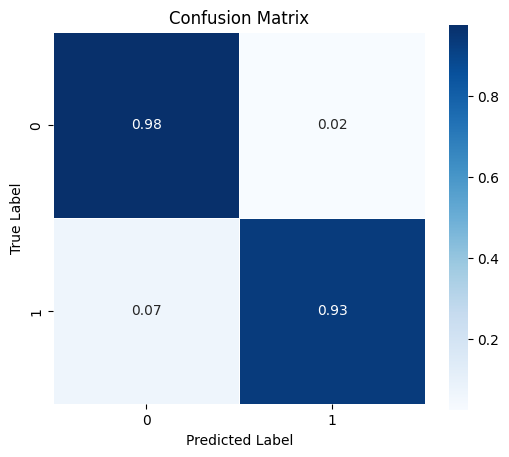

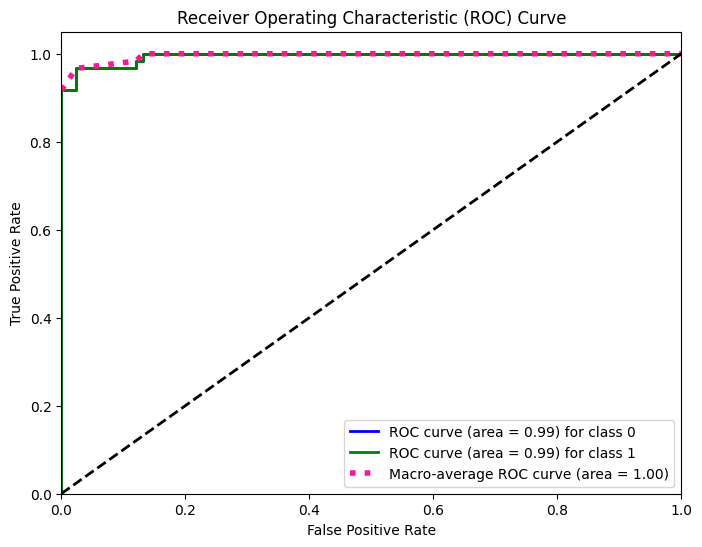

In [344]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from itertools import cycle
from sklearn.preprocessing import LabelBinarizer



rf_model = RandomForestClassifier(n_estimators=500, min_samples_split=4)
rf_model.fit(x_train, y_train)


y_pred = rf_model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 5-Fold Cross Validation
cv_scores = cross_val_score(rf_model, x, y, cv=skf, scoring='accuracy')

print(f'Cross-Validation Accuracy: {np.mean(cv_scores):.4f}')
print()

y_pred = rf_model.predict(x_test)
y_probs = rf_model.predict_proba(x_test)[:, 1]


class_names = np.unique(y)

# Function to plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5, square=True,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred, class_names)

# Function to plot ROC Curve
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
fpr, tpr, roc_auc = {}, {}, {}


for i in range(len(class_names)):
  y_test_bin = y_test_bin.reshape(-1, 1)
  fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_probs)
  roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(class_names))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(class_names)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(class_names)
fpr['macro'], tpr['macro'] = all_fpr, mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

# Plot ROC Curves
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {class_names[i]}')

plt.plot(fpr['macro'], tpr['macro'], color='deeppink', linestyle=':', linewidth=4,
         label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


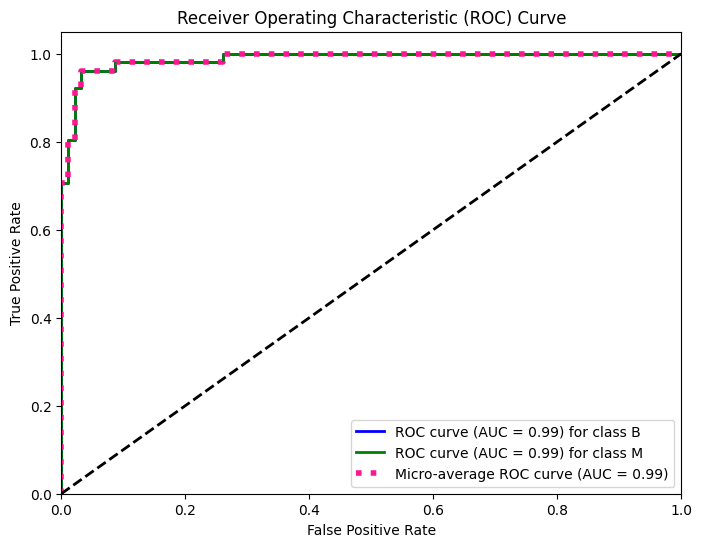

In [250]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# One-hot encode the labels

y_test_bin = label_binarize(list(y_test), classes=['B','M'])

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = {}, {}, {}

for i in range(len(class_names)):
    y_test_bin = y_test_bin.reshape(-1, 1)
    fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_probs)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute the micro-average ROC curve (averaging across all classes)
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(["blue", "green", "red", "cyan", "magenta", "yellow"])

for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for class {class_names[i]}')

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], color="deeppink", linestyle=":", linewidth=4,
         label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})')

# Diagonal baseline
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.9231
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93        83
           1       0.89      0.93      0.91        60

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143

Cross-Validation Accuracy: 0.9385



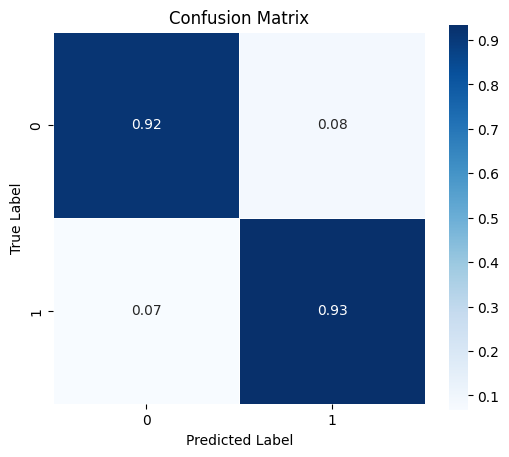

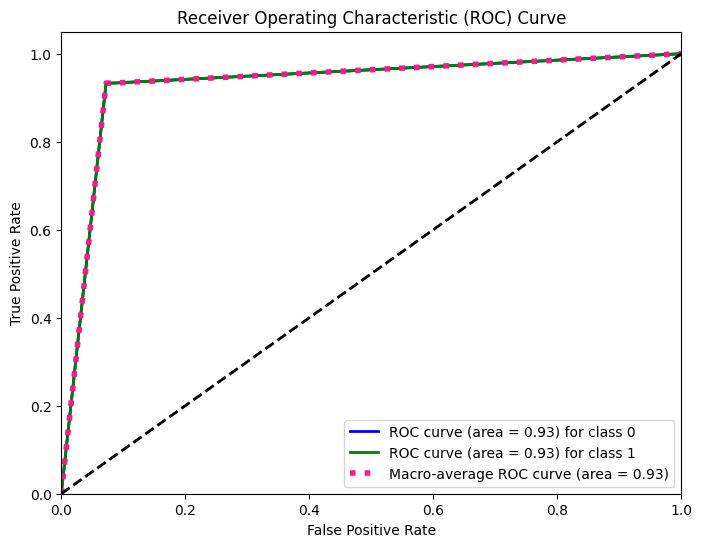

In [358]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from itertools import cycle
from sklearn.preprocessing import LabelBinarizer



rf_model = DecisionTreeClassifier( criterion='entropy', min_samples_split=4)
rf_model.fit(x_train, y_train)


y_pred = rf_model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 5-Fold Cross Validation
cv_scores = cross_val_score(rf_model, x, y, cv=skf, scoring='accuracy')

print(f'Cross-Validation Accuracy: {np.mean(cv_scores):.4f}')
print()

y_pred = rf_model.predict(x_test)
y_probs = rf_model.predict_proba(x_test)[:, 1]


class_names = np.unique(y)

# Function to plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5, square=True,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred, class_names)

# Function to plot ROC Curve
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
fpr, tpr, roc_auc = {}, {}, {}


for i in range(len(class_names)):
  y_test_bin = y_test_bin.reshape(-1, 1)
  fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_probs)
  roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(class_names))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(class_names)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(class_names)
fpr['macro'], tpr['macro'] = all_fpr, mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

# Plot ROC Curves
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {class_names[i]}')

plt.plot(fpr['macro'], tpr['macro'], color='deeppink', linestyle=':', linewidth=4,
         label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.9580
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96        83
           1       0.98      0.92      0.95        60

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143

Cross-Validation Accuracy: 0.9683



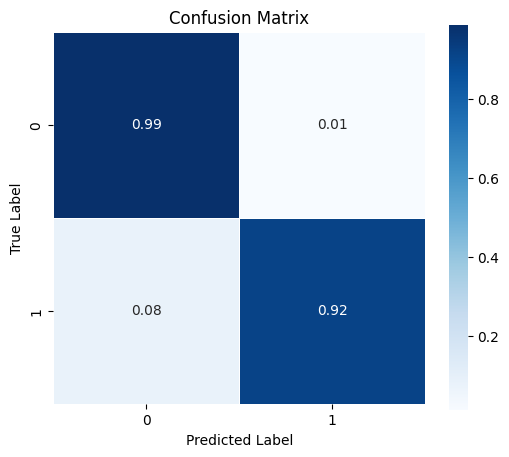

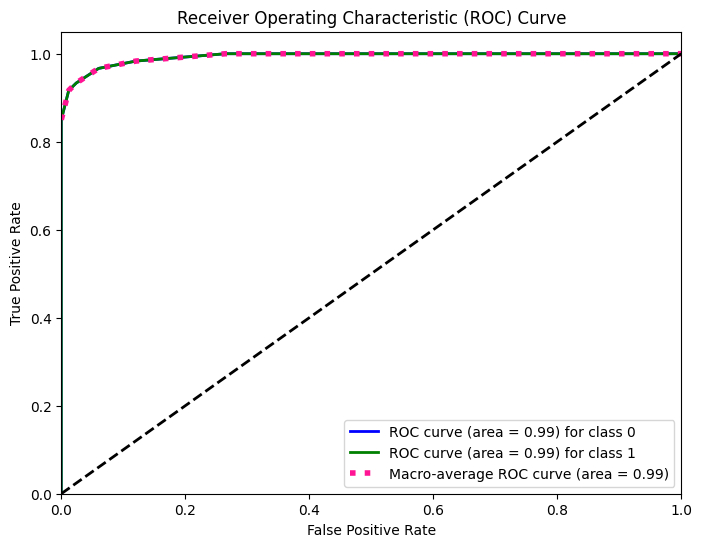

In [365]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from itertools import cycle
from sklearn.preprocessing import LabelBinarizer



rf_model = KNeighborsClassifier(n_neighbors=10, leaf_size=50)
rf_model.fit(x_train, y_train)


y_pred = rf_model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 5-Fold Cross Validation
cv_scores = cross_val_score(rf_model, x, y, cv=skf, scoring='accuracy')

print(f'Cross-Validation Accuracy: {np.mean(cv_scores):.4f}')
print()

y_pred = rf_model.predict(x_test)
y_probs = rf_model.predict_proba(x_test)[:, 1]


class_names = np.unique(y)

# Function to plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5, square=True,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred, class_names)

# Function to plot ROC Curve
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
fpr, tpr, roc_auc = {}, {}, {}


for i in range(len(class_names)):
  y_test_bin = y_test_bin.reshape(-1, 1)
  fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_probs)
  roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(class_names))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(class_names)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(class_names)
fpr['macro'], tpr['macro'] = all_fpr, mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

# Plot ROC Curves
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {class_names[i]}')

plt.plot(fpr['macro'], tpr['macro'], color='deeppink', linestyle=':', linewidth=4,
         label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.9650
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        83
           1       1.00      0.92      0.96        60

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

Cross-Validation Accuracy: 0.9824



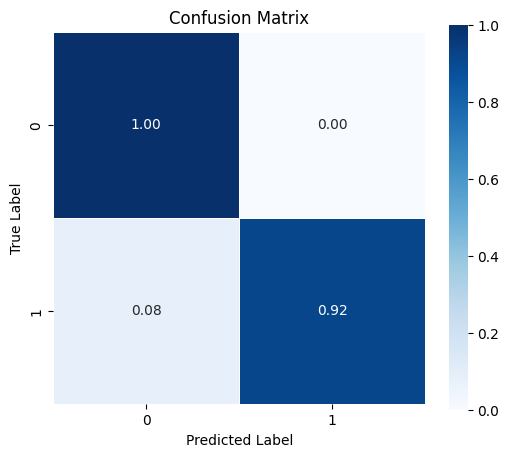

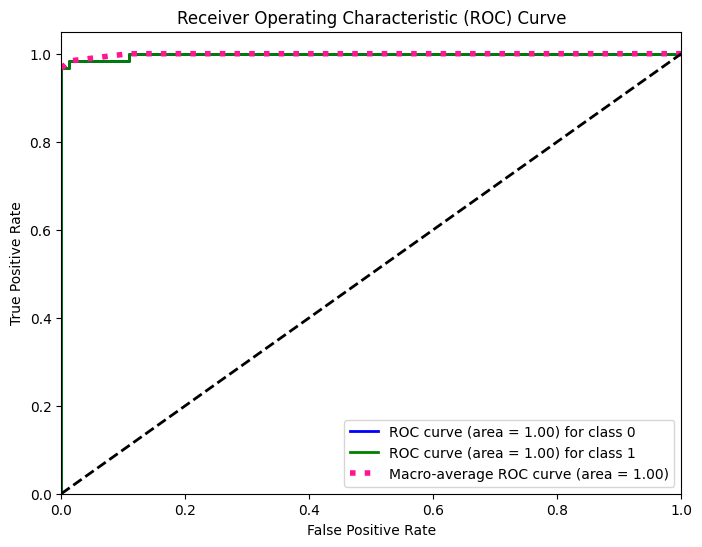

In [367]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from itertools import cycle
from sklearn.preprocessing import LabelBinarizer



rf_model = LogisticRegression(penalty='l2', solver="newton-cg")
rf_model.fit(x_train, y_train)


y_pred = rf_model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 5-Fold Cross Validation
cv_scores = cross_val_score(rf_model, x, y, cv=skf, scoring='accuracy')

print(f'Cross-Validation Accuracy: {np.mean(cv_scores):.4f}')
print()

y_pred = rf_model.predict(x_test)
y_probs = rf_model.predict_proba(x_test)[:, 1]


class_names = np.unique(y)

# Function to plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5, square=True,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred, class_names)

# Function to plot ROC Curve
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
fpr, tpr, roc_auc = {}, {}, {}


for i in range(len(class_names)):
  y_test_bin = y_test_bin.reshape(-1, 1)
  fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_probs)
  roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(class_names))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(class_names)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(class_names)
fpr['macro'], tpr['macro'] = all_fpr, mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

# Plot ROC Curves
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {class_names[i]}')

plt.plot(fpr['macro'], tpr['macro'], color='deeppink', linestyle=':', linewidth=4,
         label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.9720
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        83
           1       1.00      0.93      0.97        60

    accuracy                           0.97       143
   macro avg       0.98      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Cross-Validation Accuracy: 0.9789



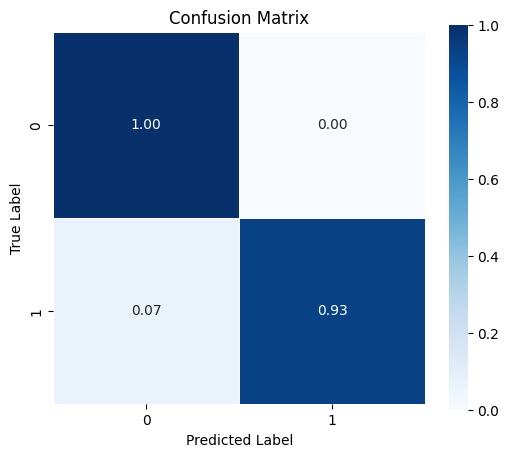

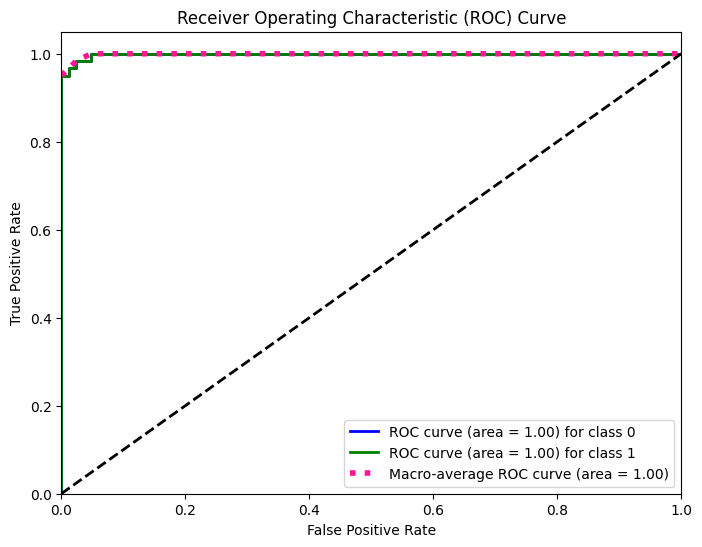

In [391]:
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from itertools import cycle
from sklearn.preprocessing import LabelBinarizer



rf_model = AdaBoostClassifier( n_estimators=95, learning_rate=1)
rf_model.fit(x_train, y_train)


y_pred = rf_model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 5-Fold Cross Validation
cv_scores = cross_val_score(rf_model, x, y, cv=skf, scoring='accuracy')

print(f'Cross-Validation Accuracy: {np.mean(cv_scores):.4f}')
print()

y_pred = rf_model.predict(x_test)
y_probs = rf_model.predict_proba(x_test)[:, 1]


class_names = np.unique(y)

# Function to plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5, square=True,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred, class_names)

# Function to plot ROC Curve
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
fpr, tpr, roc_auc = {}, {}, {}


for i in range(len(class_names)):
  y_test_bin = y_test_bin.reshape(-1, 1)
  fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_probs)
  roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(class_names))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(class_names)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(class_names)
fpr['macro'], tpr['macro'] = all_fpr, mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

# Plot ROC Curves
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {class_names[i]}')

plt.plot(fpr['macro'], tpr['macro'], color='deeppink', linestyle=':', linewidth=4,
         label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.9790
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        83
           1       1.00      0.95      0.97        60

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143

Cross-Validation Accuracy: 0.9841



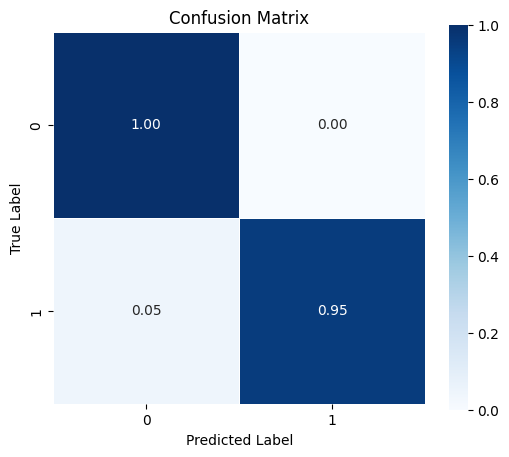

In [413]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier



# Define individual classifiers
model1 = AdaBoostClassifier( n_estimators=95, learning_rate=1)
model2 = RandomForestClassifier(n_estimators=250, min_samples_split=4)
model3 = LogisticRegression(penalty='l2', solver="newton-cg")
  # Enable probability=True for soft voting

# Create Voting Classifier (Hard Voting)
voting_clf = VotingClassifier(
    estimators=[('Ad', model1), ('Rf', model2), ('Lr', model3)],
    voting='hard'  # Use 'soft' if you want probability-based averaging
)

# Train the Voting Classifier
voting_clf.fit(x_train, y_train)

# Predictions
y_pred = voting_clf.predict(x_test)

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 5-Fold Cross Validation
cv_scores = cross_val_score(voting_clf, x, y, cv=skf, scoring='accuracy')

print(f'Cross-Validation Accuracy: {np.mean(cv_scores):.4f}')
print()



class_names = np.unique(y)

#  Function to plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5, square=True,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Plot Confusion Matrix
class_names = np.unique(y)
plot_confusion_matrix(y_test, y_pred, class_names)



In [339]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler


# Define target column name
target_column = "diagnosis"  # Replace with actual target column name

# Separate features (X) and target (y)
X = df.drop(columns=[target_column]).values  # Features
y = df[target_column].values  # Target

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert target to binary if necessary
if len(np.unique(y)) > 2:  # If more than 2 classes, use one-hot encoding
    y = pd.get_dummies(y).values

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
fold_accuracies = []

# Early Stopping Callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",  # Monitor validation loss
    patience=5,  # Stop training if no improvement after 5 epochs
    restore_best_weights=True  # Restore the best model after stopping
)
# Function to create the model
def create_model():
    model = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Perform cross-validation
for train_idx, val_idx in skf.split(X_scaled, y):
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = create_model()
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0,validation_data=(X_val, y_val), callbacks=[early_stopping])

    # Evaluate on validation set
    loss, acc = model.evaluate(X_val, y_val, verbose=1)
    fold_accuracies.append(acc)

# Print average accuracy across folds
print(f"Mean Cross-Validation Accuracy: {np.mean(fold_accuracies):.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9779 - loss: 0.0334
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0072
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0069
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9115 - loss: 0.2335
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9779 - loss: 0.1381
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9779 - loss: 0.0694
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 6.8822e-04
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9883 - loss: 0.0493
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9779 - loss: 0.0772
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0051
Mean Cross-Validation Accuracy: 0.9842


In [340]:
fold_accuracies

[0.9824561476707458,
 1.0,
 1.0,
 0.9298245906829834,
 0.9824561476707458,
 0.9824561476707458,
 1.0,
 0.9824561476707458,
 0.9824561476707458,
 1.0]